In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Извлекаем из datetime категориальные признаки hour, day, month, year

In [10]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


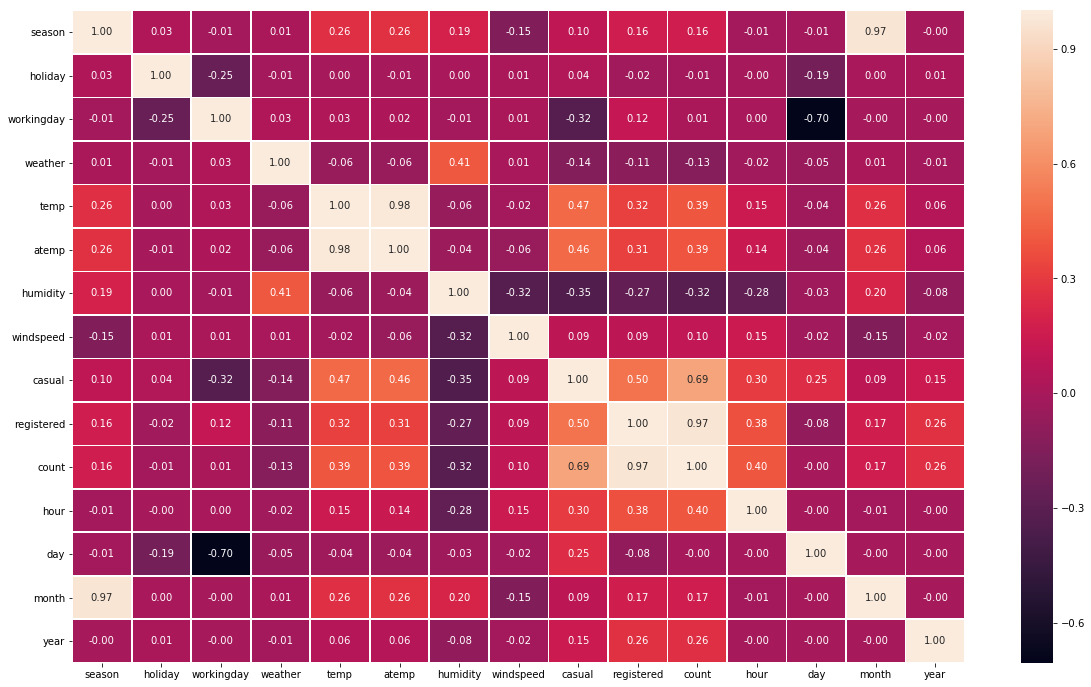

In [11]:
features=[]
for i in train :
    features.append(i)
cor_features = train[features]
f,ax = plt.subplots(figsize=(20, 12))
sns.heatmap(cor_features.corr(), annot=True, linewidths=.7, fmt= '.2f',ax=ax)
plt.show()

#### Регрессия без категориальных признаков

In [12]:
X = train.drop(['datetime', 'registered', 'count', 'season','weather','hour','day','month','year'], axis = 1)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=5)

linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)

y_pred = linearRegressor.predict(X_test)
mean_squared_error(y_test, y_pred)

14792.43342690122

#### Применяем one-hot encoding к признакам season и weather

In [13]:
from sklearn.preprocessing import OneHotEncoder
s_ohe = OneHotEncoder()
w_ohe = OneHotEncoder()
Xs = s_ohe.fit_transform(train.season.values.reshape(-1,1)).toarray()
Xw = w_ohe.fit_transform(train.weather.values.reshape(-1,1)).toarray()


OneHot = pd.DataFrame(Xs, columns = ["Season_"+str(int(i+1)) for i in range(Xs.shape[1])])
train = pd.concat([train, OneHot], axis=1)

OneHot = pd.DataFrame(Xw, columns = ["Weather"+str(int(i+1)) for i in range(Xw.shape[1])])
train = pd.concat([train, OneHot], axis=1)

train.head()

C:\Users\pshep\Miniconda3\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\pshep\Miniconda3\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,year,Season_1,Season_2,Season_3,Season_4,Weather1,Weather2,Weather3,Weather4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Регрессия с one-hot encode признаками, MSE уменьшилась

In [14]:
X = train.drop(['datetime', 'registered', 'count', 'season', 'weather'], axis = 1)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=5)

linearRegressor1 = LinearRegression()
linearRegressor1.fit(X_train, y_train)

y_pred1 = linearRegressor1.predict(X_test)
mean_squared_error(y_test, y_pred1)

12932.893401638723